In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import uniform


Text(0, 0.5, 'p(f)')

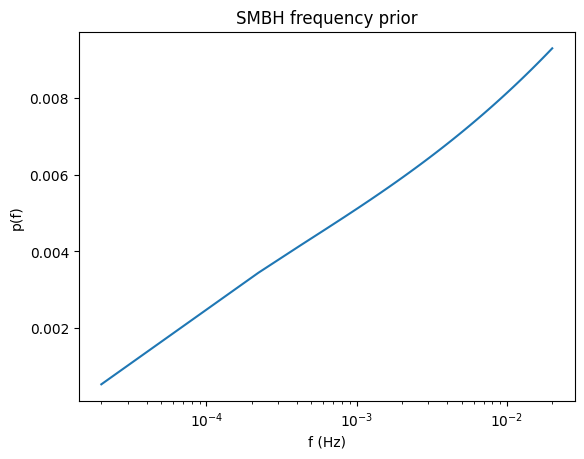

In [2]:
Phi_s=10**(-3)
M_star=10**8.4
alpha=-1.19

alpha_moy=0.12
f_min=2e-5
f_max=2e-2
f=np.linspace(f_min,f_max,100)

def Dist_BH(f):
    M=(645*10*alpha_moy)/(f*0.1)
    return Phi_s*(M/(M_star))**(1+alpha)*np.exp(1-(M/(M_star)))

plt.semilogx(f,Dist_BH(f))
plt.title('SMBH frequency prior')
plt.xlabel(r'f (Hz)')
plt.ylabel(r'p(f)')


[6.23308638e-04 7.31450305e-01 3.91414948e+00 9.75448926e+00
 1.80862145e+01 2.87817778e+01 4.17102534e+01 5.66883014e+01
 7.34491810e+01 9.16273223e+01 1.10761308e+02 1.30318340e+02
 1.49738513e+02 1.68490263e+02 1.86123424e+02 2.02306624e+02
 2.16841690e+02 2.29655771e+02 2.40778024e+02 2.50309748e+02
 2.58395366e+02 2.65198605e+02 2.70885359e+02 2.75612804e+02
 2.79523475e+02 2.82742836e+02 2.85379080e+02 2.87524184e+02
 2.89255596e+02 2.90638121e+02 2.91725779e+02 2.92563513e+02
 2.93188697e+02 2.93632429e+02 2.93920619e+02 2.94074900e+02
 2.94113379e+02 2.94051257e+02 2.93901333e+02 2.93674422e+02
 2.93379697e+02 2.93024966e+02 2.92616900e+02 2.92161222e+02
 2.91662863e+02 2.91126087e+02 2.90554598e+02 2.89951627e+02
 2.89320003e+02 2.88662217e+02 2.87980468e+02 2.87276709e+02
 2.86552680e+02 2.85809938e+02 2.85049883e+02 2.84273781e+02
 2.83482776e+02 2.82677912e+02 2.81860144e+02 2.81030346e+02
 2.80189323e+02 2.79337823e+02 2.78476534e+02 2.77606102e+02
 2.76727127e+02 2.758401

Text(0, 0.5, 'Distribution of ($h_0 $)')

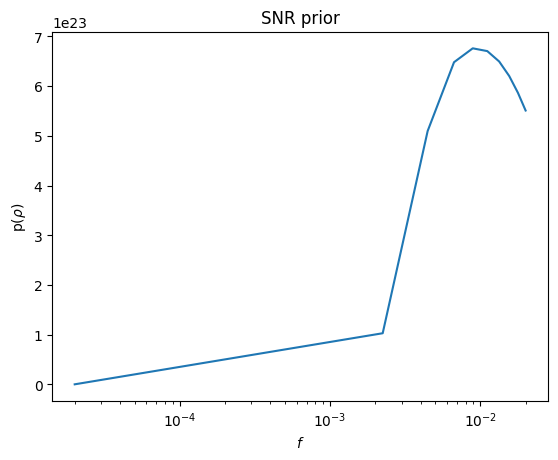

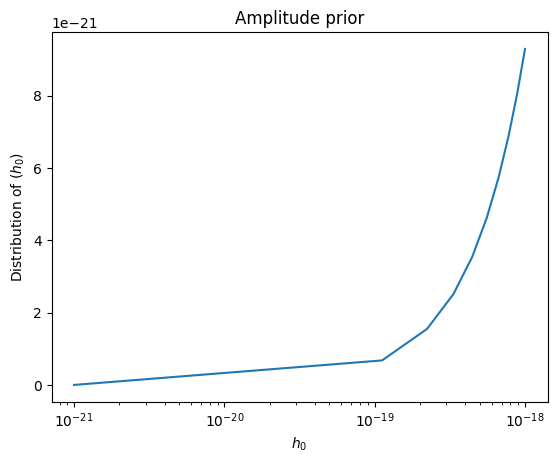

In [14]:
c = 299792458.0
L_m = 2.5e9
L = L_m/c

 
import ldc
from ldc.lisa.noise import get_noise_model

def S_h(f): 
    omegaL = 2*np.pi*f*L
    PSD_fX2 = get_noise_model("SciRDv1",f).psd(option='X',tdi2=True)
    return (20/3)*(1+0.6*(omegaL)**2)*(PSD_fX2/((4*omegaL)**2*(np.sin(omegaL)**2)*(2*np.sin(2*omegaL))**2))
    
def C_ampSNR(Tobs,f):
    return (2/np.sqrt(5))*np.sqrt(Tobs/S_h(f))

def snr(Tobs,f,h0):
    return (2/np.sqrt(5))*h0*np.sqrt(Tobs/S_h(f))

def Phi_snr(h0,Tobs,f):
    #snr(m:f,z:h0)
    s=snr(Tobs,f,h0)
    return Dist_BH(f)*s



def P_h0(h0,Tobs,f):
    #f=
    #return P_snr(rho)/rho(Tobs,f,A)
    #return P_snr(rho)*(1/(1/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)))))
    return Phi_snr(h0,Tobs,f)*(1/(C_ampSNR(Tobs,f)))


T=3.0E7
h0=1e-21
rho=snr(T,f,h0)
print(rh0)


f=np.linspace(f_min,f_max,10)

plt.semilogx(f,Phi_snr(rho,T,f))
#print(Phi_snr(10))
#print(max(Phi_snr(rho)))

plt.title('SNR prior')
plt.xlabel(r'$f $')
plt.ylabel(r'p($\rho $)')
#h0=rho*(1/C_ampSNR(T,f))
#print(h0)
plt.figure()

#rho=7
h0=np.linspace(1e-21,1e-18,10)
plt.semilogx(h0,P_h0(h0,T,f))
plt.title('Amplitude prior')
plt.xlabel(r'$h_0$')
plt.ylabel(r'Distribution of ($h_0 $)')




[1.07092032e-01 1.19086340e+02 2.38065588e+02 3.57044835e+02
 4.76024083e+02 5.95003331e+02 7.13982578e+02 8.32961826e+02
 9.51941074e+02 1.07092032e+03]


Text(0, 0.5, 'Distribution of ($h_0 $)')

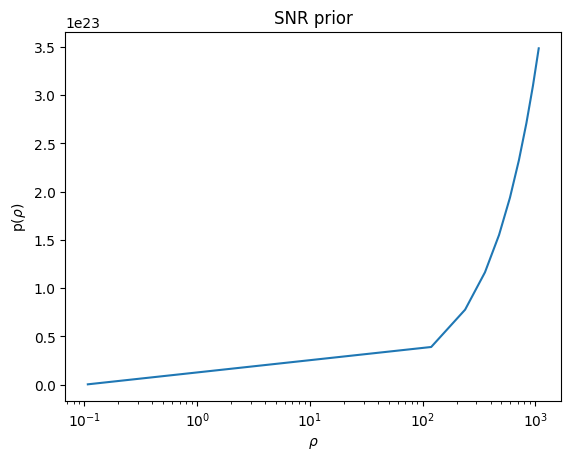

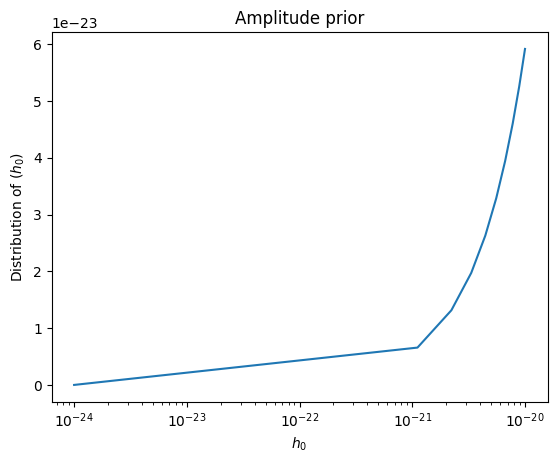

In [13]:
c = 299792458.0
L_m = 2.5e9
L = L_m/c

 
import ldc
from ldc.lisa.noise import get_noise_model

def S_h(f): 
    omegaL = 2*np.pi*f*L
    PSD_fX2 = get_noise_model("SciRDv1",f).psd(option='X',tdi2=True)
    return (20/3)*(1+0.6*(omegaL)**2)*(PSD_fX2/((4*omegaL)**2*(np.sin(omegaL)**2)*(2*np.sin(2*omegaL))**2))
    
def C_ampSNR(Tobs,f):
    return (2/np.sqrt(5))*np.sqrt(Tobs/S_h(f))

def snr(Tobs,f,h0):
    return (2/np.sqrt(5))*h0*np.sqrt(Tobs/S_h(f))

def Phi_snr(h0,Tobs,f):
    #snr(m:f,z:h0)
    s=snr(Tobs,f,h0)
    return Dist_BH(f)*s



def P_h0(h0,Tobs,f):
    #f=
    #return P_snr(rho)/rho(Tobs,f,A)
    #return P_snr(rho)*(1/(1/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)))))
    return Phi_snr(h0,Tobs,f)*(1/(C_ampSNR(Tobs,f)))


T=3.0E7
f=2e-3
h0=np.linspace(1e-24,1e-20,10)
#h0=1e-21
rh0=snr(T,f,h0)
print(rh0)


#f=np.linspace(f_min,f_max,10)

plt.semilogx(rh0,Phi_snr(rho,T,f))
#print(Phi_snr(10))
#print(max(Phi_snr(rho)))

plt.title('SNR prior')
plt.xlabel(r'$\rho $')
plt.ylabel(r'p($\rho $)')
#h0=rho*(1/C_ampSNR(T,f))
#print(h0)
plt.figure()

#rho=7

plt.semilogx(h0,P_h0(h0,T,f))
plt.title('Amplitude prior')
plt.xlabel(r'$h_0$')
plt.ylabel(r'Distribution of ($h_0 $)')




[1.6152861092310642e+16, 2907049868636.9336, 1453655742405.9893, 969132900222.6294, 726860577639.5378, 581493695424.0563, 484580986959.44965, 415356911762.77783, 363438465980.82446, 323057221846.2129]
[1.6152861092310642e+16, 2907049868636.9336, 1453655742405.9893, 969132900222.6294, 726860577639.5378, 581493695424.0563, 484580986959.44965, 415356911762.77783, 363438465980.82446, 323057221846.2129]
[1.6152861092310642e+16, 2907049868636.9336, 1453655742405.9893, 969132900222.6294, 726860577639.5378, 581493695424.0563, 484580986959.44965, 415356911762.77783, 363438465980.82446, 323057221846.2129]


(2e-05, 0.02)

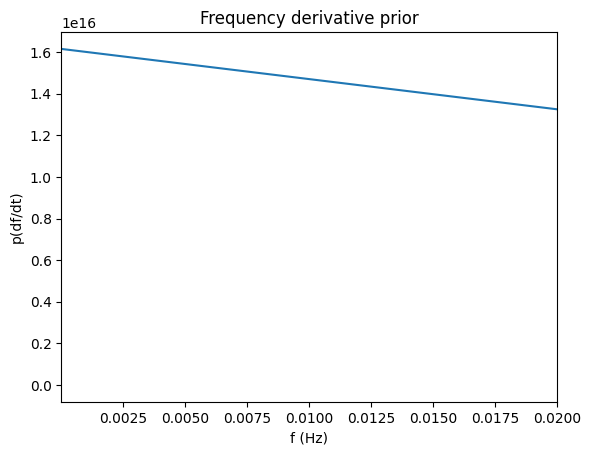

In [12]:
f_min=2e-5
f_max=1

chi=0.5

def Prob_fder(f):
    val=[]
    for i in (list(f)):
        M=(645*10*alpha_moy)/(i*0.1)
        der=3*10e-14*(10/M)*(alpha_moy/0.1)**19*chi**2
        a=10e-2*der
        b=10e2*der
        if (der>=a) & (der<=b):
            val.append((1/(b-a)))
        else :
            val.append(0)
    print(val)
    return val
    

f_domain = np.linspace(f_min,f_max,10)
plt.title('Frequency derivative prior')
plt.xlabel(r'f (Hz)')
print(Prob_fder(f_domain))
plt.ylabel(r'p(df/dt)')
plt.plot(f_domain,Prob_fder(f_domain))
plt.xlim([f_min,0.02])


In [25]:
def Prob_pos(beta,lamb):
    P=[]
    
    for b in beta:
        for l in lamb:
            P.append(0.1)
    
    P_tot = []
    
    for i in range(N):
        P_tot.append([])
        P_tot[i]=P[0+N*i:(i+1)*N]
        
    return P_tot

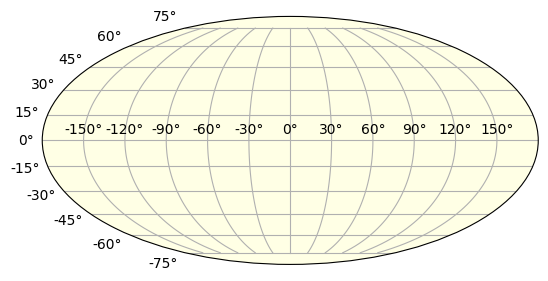

In [23]:
tab_l_deg=np.linspace(-180,180,N)
tab_b_deg=np.linspace(-90,90,N)

tab_l_rad=np.linspace(-np.pi,np.pi,N)
tab_b_rad=np.linspace(-np.pi/2,np.pi/2,N)

l, b = np.meshgrid(np.radians(tab_l_deg),np.radians(tab_b_deg))

plt.figure()
ax = plt.subplot(111, projection='mollweide')
plt.pcolormesh(l, b, (Prob_pos(tab_b_rad,tab_l_rad)),cmap='YlOrBr')

plt.grid()
#plt.savefig('Positiondistribution.png')
plt.show()

In [27]:
def Prob_pos(beta,theta):
    
     return 0.1

print(Prob_pos(np.pi,np.pi))

0.1
